# review 3

- 데이터 전처리는 0322곽도성 파일 확인

- 사이킷런으로 수행하는 타이타닉 생존자 예측

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# IPython에 대한 표현방식으로서 Rich output(그림, 소리 ,애니메이션) 출력 옵션이다.
# 이미지, 사운드, 애니메이션 등으로 표현할 수 있는 객체를 프론트(Jupyter Notebook)에서 표시되도록 하는 기능


titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- 칼럼 타입 확인해보자
  - df.info()

In [61]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- pandas의 object 타입은 string 문자열 타입으로 봐도 무방하다. 
- #### `사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 전처리 수행해야 함`
  - DataFrame의 fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경하자.

- Null 컬럼들에 대한 전처리
  - Age, Cabin, Embarked 칼럼만 Null 값이 존재한다. 

In [62]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True) # 어차피 'Cabin'칼럼이 문자열 칼럼이라서 일단 Null값도 문자열('N')로 변환
titanic_df['Embarked'].fillna('N',inplace=True) # 어차피 'Embarked'칼럼이 문자열 칼럼이라서 일단 Null도 문자열('N')로 변환

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [63]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [65]:
titanic_df.isnull().sum().sum()

0

In [66]:
titanic_df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,N,Q


In [67]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 현재 남아있는 문자열 feature는 Sex,Cabin,Embarked이다.
  - 물론 Name, Ticket도 있는데, 분석 대상으로서 효과가 없을 것 같아서 논외로 차치해둔 것 같음

In [68]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin의 경우 N이 687건으로 가장 많은 것이 좀 특이하긴 함.
  - 속성값이 제대로 정리되지 않은 것 같음
- Cabin의 경우 첫글자가 제일 중요해보이므로 첫글자만 따서 재정리해보자

----

# *****************************`추가 학습`*****************************

# `판다스 문자열 관련 함수 str`(판다스에서 문자열처리하는 method)
  - 판다스에서 문자열 관련 함수를 사용하거나 전처리를 하기 위해서는 함수 및 명령어 앞에 str을 붙여준다
    - 1) 인덱싱하기
      - titanic_df['Cabin'].str[:1]
    - 2) 분할하여 list에 모아두기 (이 경우는 space로 문자열이 구분되어져 있을 때 )
      - titanic_df['Cabin'].str.split(' ')
      - 분할된 개별 list를 바로 df으로 만드려면 expand = True 옵션을 추가한다. 
      - titanic_df['Cabin'].str.split(' ', expand = True)
    - 3) 시작글자 인식하여 Boolean 형태로 반환해주기
      - titanic_df['Cabin'].str.startwith('N')
      - 위 반환 결과는 Boolean이기 때문에 이 결과를 이용하여 바로 필터링에 사용할 수 있다.
      - titanic_df[titanic_df['Cabin'].str.startwith('N')]
    - 4) 끝글자 인식하여 Boolean 형태로 반환해주기(필터링까지 한 번에 해보기)
      - titanic_df[titanic_df['Cabin'].str.endswith('N')]
    - 5) 포함글자 인식하여 필터링까지 한 번에 해보기
      - titanic_df[titanic_df['Cabin'].str.contains('N')]
      - 이것도 결과가 Boolean으로 반환되기 때문에 필터링에 활용할 수 있다. 
    - 6) 문자 위치 찾기
      - titanic_df.str.find('C') # 이건 왼쪽부터 검색
      - 검색 후 없는 건 -1로 반환되고 있는 건 indexing 번호로 반환된다. 


   - 이 외에도 pandas의 DataFrame에서 만약 문자열 칼럼이 있다면 .str의 여러 함수를 통해 문자열 처리할 수 있다. 


---

In [69]:
titanic_df['Cabin'].str

- 해당 셀의 반환 결과가 strings.accessor.StringMethods라는 걸 알 수 있다. 

In [70]:
# 문자열 인덱싱해서 새로운 열 생성하기(여기서는 기존의 열 Cabin을 인덱싱해서 기존의 열 구성을 변경해준 것임)
# 문자열 쪼개서 새로운 열을 생성해줄 수도 있다.
# 다음을 참고한다. 
# https://hleecaster.com/pandas-data-cleaning-2/
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
# pandas의 문자열 칼럼 처리하는 여러 함수 중 index slicing하는 기능 이용중인 것.
print(titanic_df['Cabin'].head(3))
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

- 머신러닝 알고리즘을 적용해 예측 수행 전, 데이터를 먼저 탐색해보자
  - 어떤 유형의 승객이 생존 확률이 높을까?
  - 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수를 비교해보자

---

# *****`추가 학습`*****

# **********`pandas DataFrame의 GroupBy 기능 이용하기`**********
  - groupby 함수의 반환 값은 GroupBy 클래스 객체이다.
  - 구체적으로 말하면 객체는 두가지로 만들 수 있다.
    - GroupBy 클래스의 객체를
      - 단지 column 이름만으로 색인(indexing)한다면 $\to$ SeriesGroupBy 객체가 생성될 것이고 
      - column 이름을 list 배열에 담아서 색인(indexing)한다면 $\to$ DataFrameGroupBy 객체가 생성된다.
      - 여러 칼럼을 동시에 그룹핑하여 요약정보들을 확인할 땐, DataFrameGroupBy 객체를 생성하는 게 용이하다.
  - 해당 객체를 이용해서 여러 요약정보를 확인할 수 있는데, 이 객체를 임의의 특정 변수에 담아 사용할 수도 있다.
    - 이를테면 sex = titanic_df.groupby(['Sex'])
    - sex에 DataFrameGroupBy라는 객체가 담겨있고
    - sex.size()와 같이
    - 다양한 그룹 연산 메소드를 활용할 수 있다. 

In [71]:
# 이건 지금 column이름이 담긴 배열로 색인했음을 알 수 있다.
# 그 차이를 비교해보자
sex = titanic_df.groupby(['Sex']) # sex = titanic_df.groupby('Sex') 대체 가능하다

In [72]:
sex.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [73]:
titanic_df.groupby(['Sex']).size()

Sex
female    314
male      577
dtype: int64

In [74]:
a = titanic_df.groupby(['Sex','Survived'])['Survived']
a

In [75]:
b = titanic_df.groupby(['Sex','Survived'])[['Survived']]
b

In [76]:
a.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [77]:
b.count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

- 다름을 알 수 있다. 

---

In [78]:
titanic_df.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,314,314,314,314,314,314,314
male,577,577,577,577,577,577,577,577,577,577,577


In [79]:
titanic_df.groupby(['Sex','Survived'])['Survived']

In [80]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

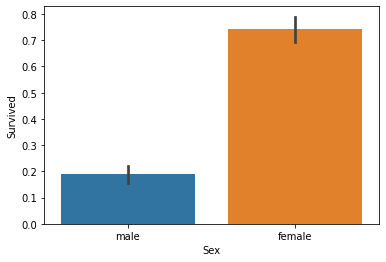

In [81]:
# import seaborn as sns
sns.barplot(x='Sex', y='Survived', data = titanic_df)

- 부자와 가난한 사람 간의 생존 확률에 대해 알아보자
  - 객실 등급으로 확인할 수 있을 것이다. 
  - + 성별까지 함께 고려해보자 
    - hue 파라미터를 추가해주면 된다. 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

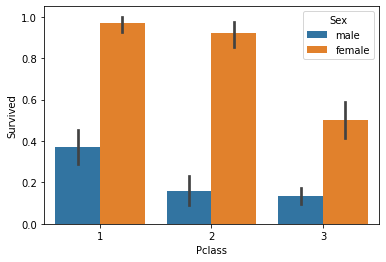

In [82]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)
# 구분 기준이 Pclass와 Sex가 되는 것이다.

- 분석
  - 여성의 경우 일,이등실에 따른 생존 확률의 차이가 크지 않으나. 삼등실의 경우 생존 확률이 상대적으로 많이 떨어졌다.
  - 남성의 경우 일등실의 생존확률이 이,삼등실의 생존확률보다 월등히 높다. 

- Age에 따른 생존 확률을 알아보자
  - 값 종류가 많기 때문에 카테고리를 나눠서 분석해보자

---

# *****************************`추가 학습`*****************************
#  pandas의 DataFrame method 알아보기

- 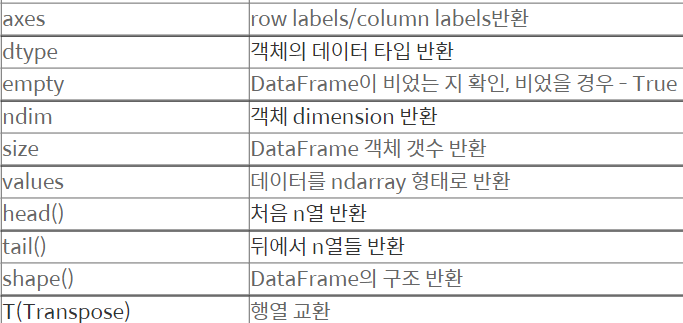
- dtype은 안 되는 것 같음

- apply 활용하기

- 예를 들면

In [83]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S


```python
titanic_df.apply(np.sqrt,axis=0)
```

- str같은 type이 있으니 당연히 실행 안 될것

In [84]:
titanic_df.PassengerId.apply(np.sqrt,axis=0)

0       1.000000
1       1.414214
2       1.732051
3       2.000000
4       2.236068
         ...    
886    29.782545
887    29.799329
888    29.816103
889    29.832868
890    29.849623
Name: PassengerId, Length: 891, dtype: float64

In [85]:
titanic_df.PassengerId.apply(np.sqrt,axis=1)

0       1.000000
1       1.414214
2       1.732051
3       2.000000
4       2.236068
         ...    
886    29.782545
887    29.799329
888    29.816103
889    29.832868
890    29.849623
Name: PassengerId, Length: 891, dtype: float64

In [86]:
titanic_df.PassengerId.apply(np.sqrt)

0       1.000000
1       1.414214
2       1.732051
3       2.000000
4       2.236068
         ...    
886    29.782545
887    29.799329
888    29.816103
889    29.832868
890    29.849623
Name: PassengerId, Length: 891, dtype: float64

- axis를 행이나 열이나 뭘로 설정해도 동일한 결과
  - 어차피 각 data에 루트 씌우는 거라서
  - axis 설정 안 해줘도 되긴 함
- 그런데 np.mean 같은 함수를 사용할 땐, 축 설정 해줘야 함

In [87]:
(lambda x : np.sqrt(x))(4)

2.0

In [88]:
g = lambda x : np.sqrt(x)
g(9)
# 이거 자체가 함수

3.0

- lambda를 map에 사용해보자

# map(변환 함수, 순회 가능 data)
- 여러 개의 데이터를 한 번에 다른 형태로 변환하기 위해서 사용
  - 따라서, 여러 개의 데이터를 담고 있는 list나 tuple을 대상으로 주로 사용하는 함수
- map 함수는 함수를 인자로 받기 때문에 함수가 필요
  - 이때 lambda를 이용할 수 있다. 

- 여러 개의 데이터를 한 번에 다른 형태로 변환하기 위해서 사용한다고 했으니
- titanic_df의 PassengerId 칼럼을 str으로 바꿔서 반환해보자

In [89]:
titanic_df['strID'] = list(map(lambda x : str(x), titanic_df.PassengerId))

In [90]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,strID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,3


In [91]:
titanic_df.info()
# titanic_df.info랑 반환 결과가 다름
# titanic_df.describe()은 요약통계량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  strID        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


- 보면 0번 칼럼과 12번 칼럼의 Dtype이 다른 걸 알 수 있음

---

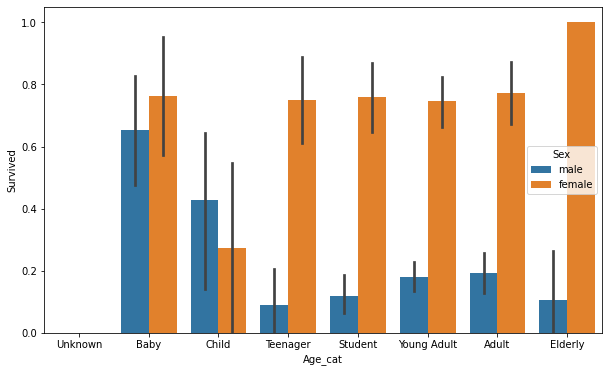

In [92]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = '' # 구분 카테고리를 담은 빈 str 생성
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat
# 함수 값 돌려주는 return 명시해주자

# 막대그래프의 크기 figure를 더 크게 설정
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# DataFrame의 apply lambda식에 사용
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
# order = group_names을 통해 X축의 값을 순차적으로 표시해준다.
titanic_df.drop('Age_cat', axis=1, inplace=True) # 그래프 그리려고 사용했던 칼럼이니까 사용 뒤 삭제해주는 것뿐

- 분석
  - 여자 Baby의 경우 생존 확률이 높다. 
  - 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮다. 
  - 여자 Elderly의 경우 매우 높은 생존 확률을 보인다. 

---
>  결론

    Sex, Age, PClass 등이 생존을 좌우하는 feature임을 어느 정도 확인할 수 있었다. 

---

- 좀 전에 확인했던 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환해보자
  - LabelEncoder 클래스 활용

In [93]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder() # preprocessing.Labelencoder 객체 생성 le에 저장
        le = le.fit(dataDF[feature]) 
        # 데이터 변환을 위한 기준 정보 설정
        # 기존에 있던 titanic_df의 칼럼들 중 Cabin,Sex, Embarked칼럼의 data를 변경해주는 것
        # 없던 칼럼을 만들어서 data를 저장하는 게 아니라 기존에 있던 칼럼의 data를 label로 변경해주는 것
        dataDF[feature] = le.transform(dataDF[feature]) # 설정된 기준 정보를 이용하여 데이터 변환
        # 이 값들을 해당 feature에 넣어줄 것임.
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,strID
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,5


- for문에서 features를 지정해준 속성들이 숫자형으로 바뀐 것을 알 수 있다. 

---

- 지금까지 수행한 전처리
  - 1) Null 처리
    - pandas의 DataFrame method 중 fillna를 이용해서 수로 이루어진 칼럼은 그 칼럼의 평균으로 대체 해주었고
    - 그렇지 않은 문자열로 이루어진 칼럼은 동일하게 문자(예를 들면, 'N')로 변경해주었음
      - 해당 문자열은 LabelEncoder로 수로 변경해주었음 -> 과정 3
  - 2) 머신러닝 알고리즘에 불필요한 속성 제거
    - 이름이나 티겟번호나 고유ID는 분석할 목적에 영향이 없다고 판단 되므로 즉, 머신러닝 알고리즘에 불필요한 속성이므로 제거하는 칼럼이다.
  - 3) 레이블 인코딩
    - 문자열은 분석 가능하도록 숫자형태로 변경할 수 있는 Label로 변경해준다. 
    - 이때 pd.dummies 함수를 이용할 수도 있겠다.
  - 그리고 1)~3)을 호출해줄 함수 설정

In [94]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    # inplace = True는 바로 해당열의 변경사항을 저장하게 해줌.
    df['Cabin'].fillna('N',inplace=True) # 애초에 문자열이었기 때문에 그냥 'N'으로 채워주는 것
    df['Embarked'].fillna('N',inplace=True) # # 애초에 문자열이었기 때문에 그냥 'N'으로 채워주는 것
    df['Fare'].fillna(0,inplace=True)
    return df
    # 이렇게 return 값을 설정해주어야 함수의 결과값을 특정 값에 저장시킬 수 있다.고 배움, 정확하진 않음

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        # from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder() # 객체 생성
        le = le.fit(df[feature]) # 기준 설정
        df[feature] = le.transform(df[feature]) # 변경 시작
    return df

######### 위 세 함수 모두 마지막에 return df를 입력해주었는데
######### 그렇게 함으로써 아래에서 df=df, df=df, df=df 를 통해 df를 함수를 이용한 결과로 업데이트 해줄 수 있다. 



# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

- 이제 데이터 전처리 수행하는 함수인 `transfrom_features`를 만든 것이다.
  - 이를 이용해 원본 데이터를 한 번 가공해보자

In [95]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('train.csv')

y_titanic_df = titanic_df['Survived']  # label데이터 셋
X_titanic_df= titanic_df.drop('Survived',axis=1) # feature 데이터 셋

# label과 feature를 분리해주는 이유는 후에 트레이닝용 데이터 셋과 테스트용 데이터 셋을 특정 비율로 분리해주는 함수를 사용해야 하기 때문이다.

X_titanic_df = transform_features(X_titanic_df)

- 테스트 데이터 추출

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

- ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용해 생존자 예측을 수행해보자
  - 예측 성능 평가는 accuracy, 정확도로 한다. 

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #  예측 성능 평가


# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11) # 객체 생성
rf_clf = RandomForestClassifier(random_state=11) # 객체 생성
lr_clf = LogisticRegression() # 객체 생성 , 회귀이기 때문에 random_state 설정해줄 필요 없다. 

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# error 발생 부분
# LogisticRegression 학습/예측/평가
# lr_clf.fit(X_train , y_train)
# lr_pred = lr_clf.predict(X_test)
# print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547


> 결론 : 3개의 ML 모델 中 LogisticRegression 정확도가 가장 높음

---

- 마지막 줄은  'str' object has no attribute 'decode'라는 ERROR 발생
  - [해결책 출처](https://www.inflearn.com/questions/126731)
  - sol 1) !pip install h5py==2.10.0
  - sol 2) !pip install h5py==2.10.0 --force-reinstall (Anaconda prompt 관리자 권한 실행)
  - sol 3) markdown==3.2.2 설치
  - 모두 해결 안 된다면, 내부 패키지가 꼬였을 확률 높음
    - Google Colab으로 해결하면 된다.

---

# ******추가 학습******
### enumerate
- 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 `인덱스 값`을 포함하는 enumerate 객체를 리턴
  - set 사용시 key값만 print되므로 key에 해당하는 값까지 print 원할 시 수정 필요
  - enumerate는 반환되는 값의 특성상 for문과 함께 사용시 적절
  - 아래는 간단한 사용 예

In [98]:
data = enumerate((1, 2, 3))
print(data)
print(type(data))

<class 'enumerate'>


In [99]:
# set 사용
data = enumerate({1, 2, 3})
for i, value in data:
    print(i, ":", value)

# 당연히 i와 value는 다른 값으로 대체 가능

0 : 1
1 : 2
2 : 3


---

- 여기서는 KFold를 사용

In [109]:
# 사이킷런의 KFold 클래스를 이용해 교차 검증을 수행하며, 폴드 개수는 5개로 설정한다.
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # clf 자리는 모델 인자가 들어갈 자리임
    
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds) # KFold 객체 생성 
    scores = [] # 예측결과 저장을 위한 list 객체 생성
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        # list에서 원소 추가해주는 함수 append
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 
# 모델로 DecisionTreeClassifier 사용하였음

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [115]:
kfold = KFold(n_splits=5)
enumerate(kfold.split(X_titanic_df))
# 이렇게 객체를 반환
# for문에서 사용시 index와 그에 해당하는 값을 반환해줌
# enumerate(kfold.split(X_titanic_df))
# 이것만 출력시 kfold 없다고 나옴
# kfold = KFold(n_splits=5)
# 이게 함수 안에서 지역변수로만 설정돼서 밖에 나오면 설정 안 되있어서 그런 것

- 교차 검증을 cross_val_score() API를 이용해 수행해보자

In [111]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
# cross_val_score는 인자로서 알고리즘 모델이 들어감 (= dt_clf)

for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


- K폴드의 평균 정확도가 약간 상이한데, 이는 cross_val_score()가 stratifiedKFold를 이용해 폴드세트를 분할하기 때문이다.

- GridSearchCV를 이용해 최적 하이퍼 파라미터를 찾고 예측 성능을 측정하자

In [34]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
# cross_val_score 마냥 인자로서 dt_clf가 들어갔음
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

# 최적 하이퍼 파라미터로 학습된 estimator를 이용해,\
# 위의 train_test_split으로 분리된 테스트 데이터 세트에 예측을 수행해 정확도 출력
best_dclf = grid_dclf.best_estimator_
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test) # 예측
accuracy = accuracy_score(y_test , dpredictions) # 평가
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


- 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다.
- 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보인다.

***`테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델의 학습과 평가는 해당 테스트 데이터 세트에만 치우친 빈약한 머신러닝 모델을 만들 가능성이 높다.`***
  - 이를 해결하기 위해
    - 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 교차 검증을 수행할 수 있다.
    - KFold, StratifiedKFold, cross_val_score, GridSearchCV